# Sample The Imaginary

## Practice Problems

3M1. Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

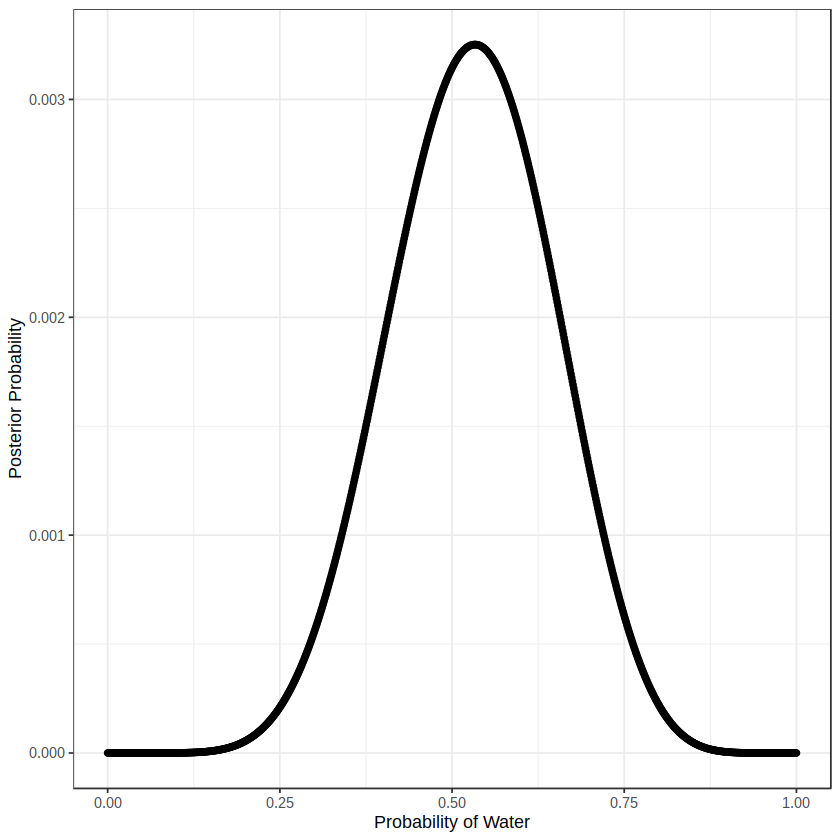

In [1]:
library(ggplot2)

p_grid <- seq(from=0, to=1, length.out=1000)

prior <- rep(1, 1000)

likelihood <- dbinom(8, size = 15, prob=p_grid)

posterior <- likelihood * prior

posterior <- posterior / sum(posterior)

ggplot(data.frame(prob=p_grid,
                  post=posterior),
      aes(x=prob, y=posterior)) +
geom_point() + geom_line() + theme_bw() +
labs(x="Probability of Water", y="Posterior Probability")

3M2. Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [5]:
samples <- sample(p_grid, size=1e4, replace=T, prob=posterior)

library(coda)
HPDinterval(as.mcmc(samples), prob=0.9) 

# stolen from here https://stats.stackexchange.com/questions/18533/find-probability-density-intervals

,lower,upper
var1,0.3293293,0.7117117


3M3. Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

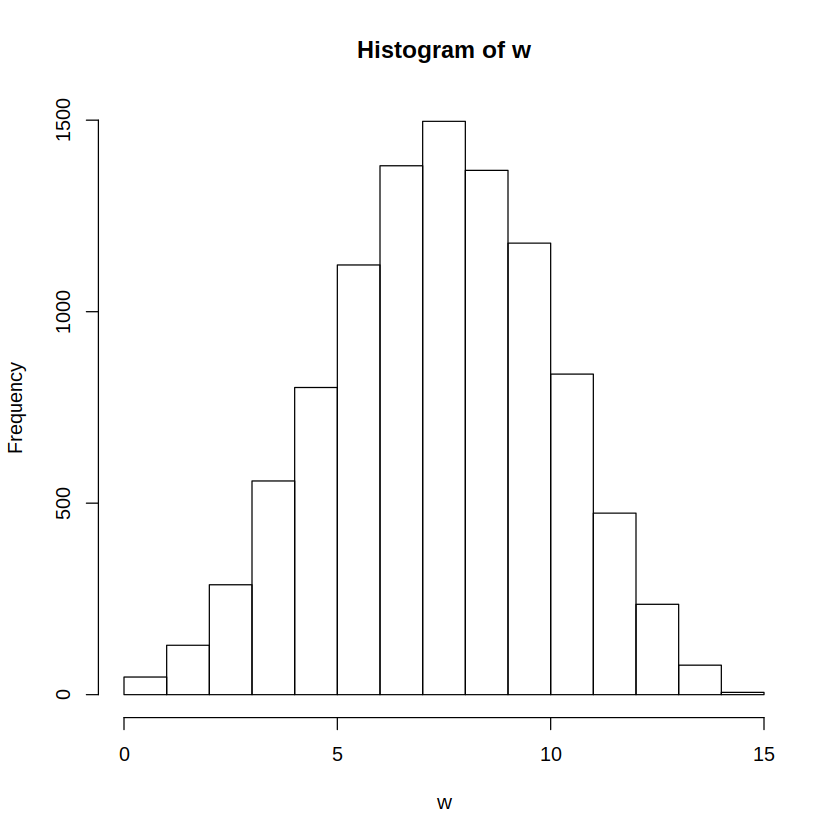

In [12]:
w <- rbinom(1e4, size=15, prob=samples)

hist(w)